## Cargar Librerías

In [1]:
import pandas as pd
from prophet import Prophet

# This was the previous name of the Prophet library
# from fbprophet import Prophet

## Cargar Datos

Los datos son acerca del consumo de cerveza mes a mes en miles de litros.

In [2]:
df = pd.read_csv('./BeerWineLiquor.csv')

In [3]:
df.head(20)

,date,beer
0,1/1/1992,1509
1,2/1/1992,1541
2,3/1/1992,1597
3,4/1/1992,1675
4,5/1/1992,1822
5,6/1/1992,1775
6,7/1/1992,1912
7,8/1/1992,1862
8,9/1/1992,1770
9,10/1/1992,1882


In [4]:
df.tail()

,date,beer
319,8/1/2018,4898
320,9/1/2018,4598
321,10/1/2018,4737
322,11/1/2018,5130
323,12/1/2018,6370


In [5]:
df.describe()

,beer
count,324.000000
mean,2972.895062
std,1010.218574
min,1501.000000
25%,2109.000000
50%,2791.000000
75%,3627.250000
max,6370.000000


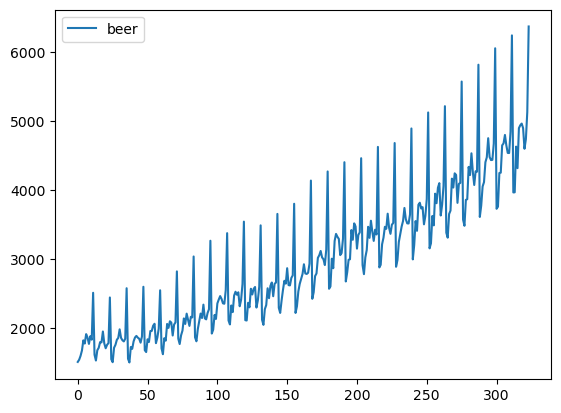

In [6]:
df.plot();

### Dar formato a los datos

In [7]:
df.columns = ['ds','y']

In [8]:
# Como por defecto tanto 'dayFirst' como 'yearFirst' son False, lo dejamos así ya que en los datos raw el mes está primero
df['ds'] = pd.to_datetime(df['ds'])

In [9]:
df.head(20)

,ds,y
0,1992-01-01,1509
1,1992-02-01,1541
2,1992-03-01,1597
3,1992-04-01,1675
4,1992-05-01,1822
5,1992-06-01,1775
6,1992-07-01,1912
7,1992-08-01,1862
8,1992-09-01,1770
9,1992-10-01,1882


## Crear y Entrenar el Modelo

In [10]:
m = Prophet()
m.fit(df)

23:52:49 - cmdstanpy - INFO - Chain [1] start processing
23:52:49 - cmdstanpy - INFO - Chain [1] done processing


## Pronósticos del futuro

### Paso 1: Crear el dataframe donde colocaremos los resultados



In [11]:
future = m.make_future_dataframe(periods = 100, freq = 'MS')

In [12]:
future.head()

,ds
0,1992-01-01
1,1992-02-01
2,1992-03-01
3,1992-04-01
4,1992-05-01


In [13]:
df.head()

,ds,y
0,1992-01-01,1509
1,1992-02-01,1541
2,1992-03-01,1597
3,1992-04-01,1675
4,1992-05-01,1822


In [14]:
df.tail()

,ds,y
319,2018-08-01,4898
320,2018-09-01,4598
321,2018-10-01,4737
322,2018-11-01,5130
323,2018-12-01,6370


In [15]:
future.tail()

,ds
419,2026-12-01
420,2027-01-01
421,2027-02-01
422,2027-03-01
423,2027-04-01



### Paso 2: Calcular los pronósticos y guardarlos en forecast

In [16]:
forecast = m.predict(future)

In [17]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1992-01-01,1772.579900,1150.149346,1474.974658,1772.579900,1772.579900,-461.717818,-461.717818,-461.717818,-461.717818,-461.717818,-461.717818,0.0,0.0,0.0,1310.862082
1,1992-02-01,1775.428361,1190.551974,1514.922757,1775.428361,1775.428361,-427.013061,-427.013061,-427.013061,-427.013061,-427.013061,-427.013061,0.0,0.0,0.0,1348.415300
2,1992-03-01,1778.093050,1441.607048,1763.529935,1778.093050,1778.093050,-178.834773,-178.834773,-178.834773,-178.834773,-178.834773,-178.834773,0.0,0.0,0.0,1599.258278
3,1992-04-01,1780.941512,1426.894219,1751.334966,1780.941512,1780.941512,-196.112637,-196.112637,-196.112637,-196.112637,-196.112637,-196.112637,0.0,0.0,0.0,1584.828874
4,1992-05-01,1783.698087,1662.580303,1987.074912,1783.698087,1783.698087,45.042535,45.042535,45.042535,45.042535,45.042535,45.042535,0.0,0.0,0.0,1828.740622


In [18]:
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
419,2026-12-01,6405.778496,7266.176997,7729.463152,6244.736698,6545.976772,1103.983199,1103.983199,1103.983199,1103.983199,1103.983199,1103.983199,0.0,0.0,0.0,7509.761695
420,2027-01-01,6421.891916,5727.840338,6173.331167,6258.362841,6563.178594,-456.738658,-456.738658,-456.738658,-456.738658,-456.738658,-456.738658,0.0,0.0,0.0,5965.153259
421,2027-02-01,6438.005336,5756.492489,6218.627752,6271.057364,6580.315025,-447.946939,-447.946939,-447.946939,-447.946939,-447.946939,-447.946939,0.0,0.0,0.0,5990.058397
422,2027-03-01,6452.559393,6006.038122,6438.142327,6281.972641,6596.003691,-222.058741,-222.058741,-222.058741,-222.058741,-222.058741,-222.058741,0.0,0.0,0.0,6230.500652
423,2027-04-01,6468.672813,6015.459088,6476.809253,6297.255118,6613.919531,-215.143866,-215.143866,-215.143866,-215.143866,-215.143866,-215.143866,0.0,0.0,0.0,6253.528948


In [19]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [20]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(12)

,ds,yhat,yhat_lower,yhat_upper
412,2026-05-01,6336.544697,6119.201673,6551.125861
413,2026-06-01,6323.181821,6099.860674,6536.135399
414,2026-07-01,6464.970224,6255.086586,6667.948962
415,2026-08-01,6380.218541,6154.931080,6591.711394
416,2026-09-01,6234.477692,6030.539904,6427.554749
417,2026-10-01,6324.169933,6105.182687,6540.700141
418,2026-11-01,6437.210181,6212.716611,6641.427337
419,2026-12-01,7509.761695,7266.176997,7729.463152
420,2027-01-01,5965.153259,5727.840338,6173.331167
421,2027-02-01,5990.058397,5756.492489,6218.627752


### Graficando los pronósticos


/home/miller/anaconda3/envs/dataScience/lib/python3.9/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/miller/anaconda3/envs/dataScience/lib/python3.9/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


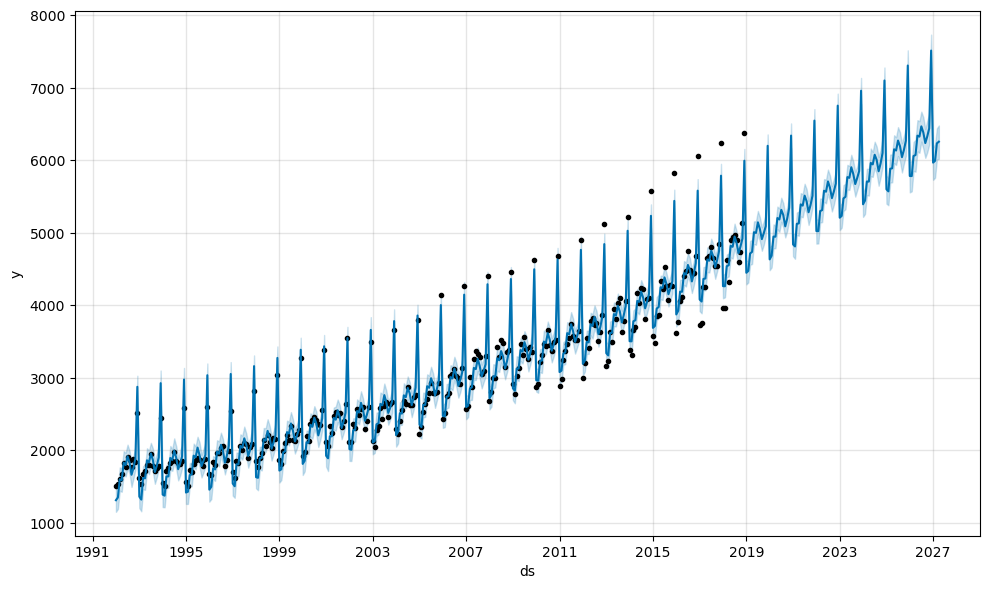

In [21]:
m.plot(forecast);

(16071.0, 18993.0)

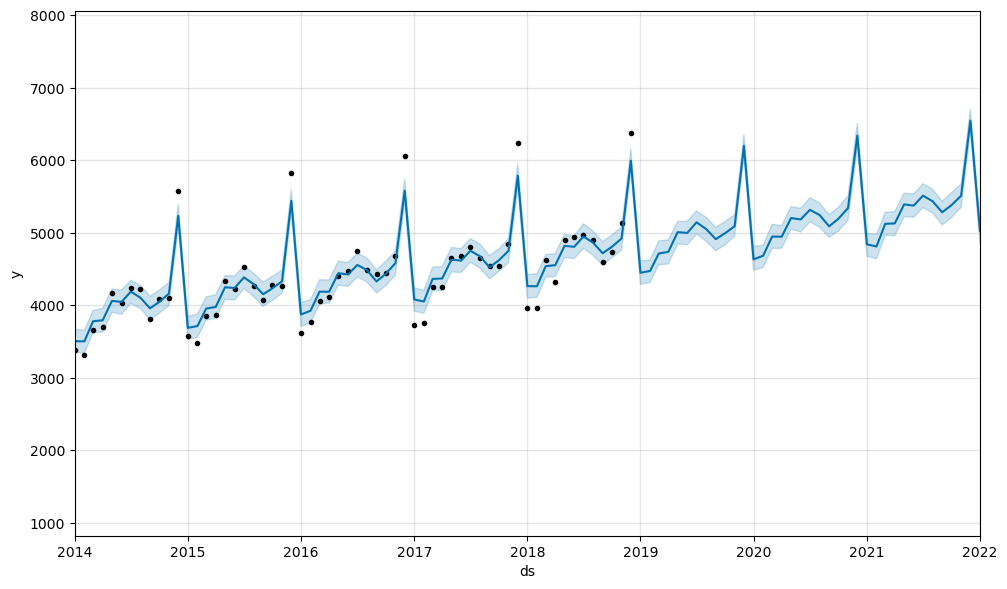

In [22]:
import matplotlib.pyplot as plt
# Registramos los convertidores para aseguramos de que matplotlib pueda gráficar datos con fechas
pd.plotting.register_matplotlib_converters()

# Gráfica de la predicción
m.plot(forecast)
plt.xlim('2014-01-01','2022-01-01')

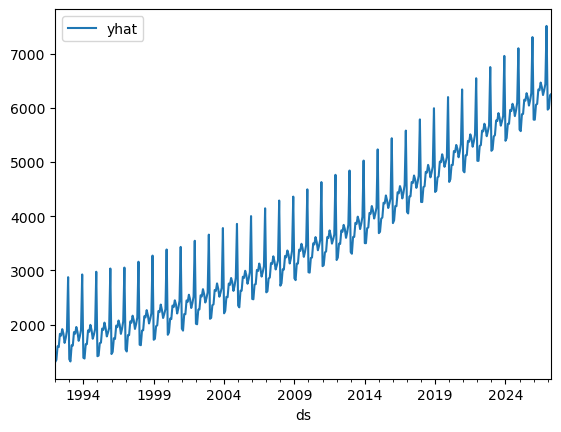

In [23]:
forecast.plot(x='ds',y='yhat');

/home/miller/anaconda3/envs/dataScience/lib/python3.9/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/miller/anaconda3/envs/dataScience/lib/python3.9/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/home/miller/anaconda3/envs/dataScience/lib/python3.9/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python d

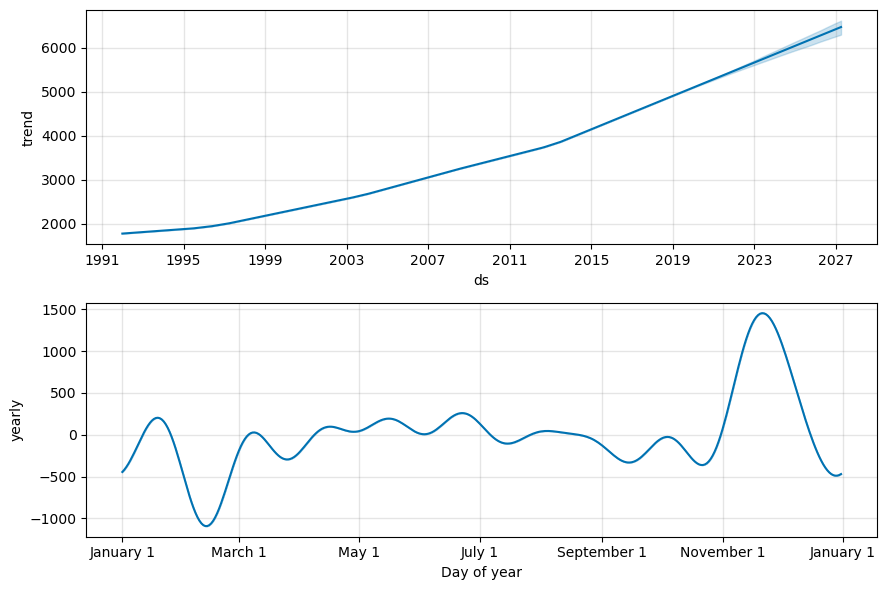

In [24]:
m.plot_components(forecast);

23:52:51 - cmdstanpy - INFO - Chain [1] start processing
23:52:51 - cmdstanpy - INFO - Chain [1] done processing
/home/miller/anaconda3/envs/dataScience/lib/python3.9/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/miller/anaconda3/envs/dataScience/lib/python3.9/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


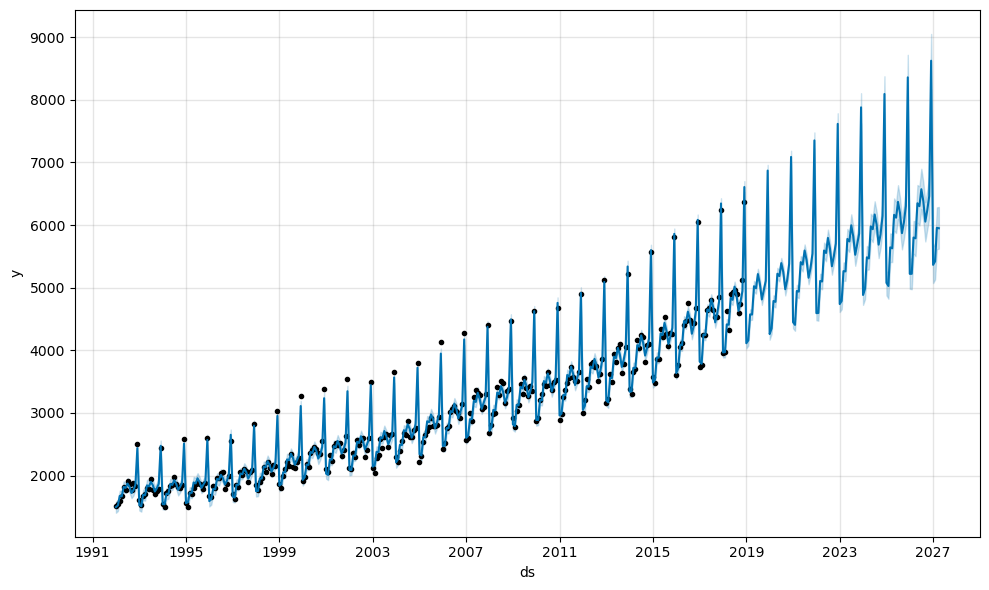

In [25]:
# Prophet tiene muchos parametros - es clave ajustarlos bien y conocerlos para no acabar con los valores por defecto

m = Prophet(seasonality_mode='multiplicative')
m.fit(df)
forecast = m.predict(future)
fig = m.plot(forecast)

In [26]:
forecast[['ds', 'yhat']].tail(100)

,ds,yhat
324,2019-01-01,4113.246733
325,2019-02-01,4158.716805
326,2019-03-01,4573.592594
327,2019-04-01,4571.453214
328,2019-05-01,5023.800765
...,...,...
419,2026-12-01,8624.881175
420,2027-01-01,5364.659013
421,2027-02-01,5419.892146
422,2027-03-01,5956.564553


/home/miller/anaconda3/envs/dataScience/lib/python3.9/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/home/miller/anaconda3/envs/dataScience/lib/python3.9/site-packages/prophet/plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
/home/miller/anaconda3/envs/dataScience/lib/python3.9/site-packages/prophet/plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python d

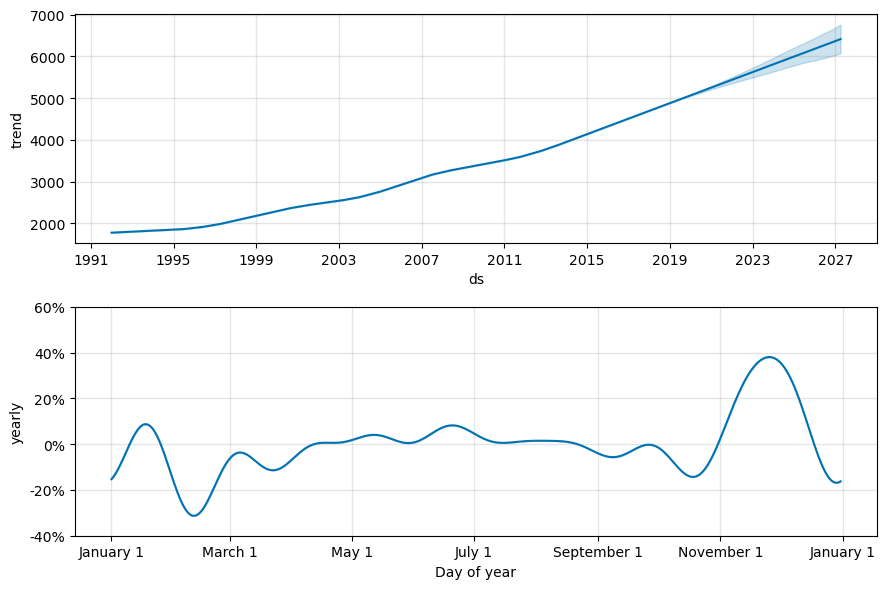

In [27]:
m.plot_components(forecast);